In [1]:
%pip install scikit-learn
%pip install seaborn
%pip install pandas
%pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 118.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.1/35.1 MB 157.3 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [3]:
# also set a random state
rs = 123

In [4]:
# Importing the pandas library, which is commonly used for data manipulation and analysis
import pandas as pd

# Defining the URL of the CSV file containing user profiles
user_profile_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/user_profile.csv"

# Using pandas' read_csv function to read the CSV file from the specified URL into a DataFrame
user_profile_df = pd.read_csv(user_profile_url)

# Displaying the first few rows of the DataFrame to inspect its contents
user_profile_df.head()


,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,2,52.0,14.0,6.0,43.0,3.0,33.0,0.0,29.0,41.0,2.0,18.0,34.0,9.0,6.0
1,4,40.0,2.0,4.0,28.0,0.0,14.0,0.0,20.0,24.0,0.0,6.0,6.0,0.0,2.0
2,5,24.0,8.0,18.0,24.0,0.0,30.0,0.0,22.0,14.0,2.0,14.0,26.0,4.0,6.0
3,7,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,8,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0


In [5]:
user_profile_df.shape

(33901, 15)

In [6]:
feature_names = list(user_profile_df.columns[1:])

In [7]:
user_profile_df.describe()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,3.390100e+04,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000
mean,1.064064e+06,5.518569,3.493791,2.307100,3.624701,0.998938,3.048022,0.001770,5.087343,4.750450,0.462995,1.017433,2.269461,0.315802,0.986844
std,4.972578e+05,7.611941,4.227254,3.841858,4.760135,2.351764,4.624004,0.072846,5.230697,7.216228,1.055186,2.342532,4.310752,1.363462,1.950585
min,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.813480e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.043907e+06,3.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.451159e+06,9.000000,6.000000,3.000000,6.000000,0.000000,3.000000,0.000000,9.000000,6.000000,0.000000,0.000000,3.000000,0.000000,2.000000
max,2.103039e+06,63.000000,18.000000,38.000000,48.000000,15.000000,39.000000,3.000000,32.000000,54.000000,6.000000,18.000000,54.000000,15.000000,12.000000


In [8]:
# Use StandardScaler to make each feature with mean 0, standard deviation 1
# Instantiating a StandardScaler object
scaler = StandardScaler()

# Standardizing the selected features (feature_names) in the user_profile_df DataFrame
user_profile_df[feature_names] = scaler.fit_transform(user_profile_df[feature_names])

# Printing the mean and standard deviation of the standardized features
print("mean {} and standard deviation{} ".format(user_profile_df[feature_names].mean(), user_profile_df[feature_names].std()))

mean Database          -2.682796e-17
Python            -5.365592e-17
CloudComputing    -1.341398e-17
DataAnalysis      -7.545364e-17
Containers         1.341398e-17
MachineLearning    3.353495e-17
ComputerVision    -7.545364e-18
DataScience       -2.012097e-17
BigData            6.706990e-17
Chatbot           -6.036291e-17
R                  5.700942e-17
BackendDev         2.012097e-17
FrontendDev        2.012097e-17
Blockchain        -6.706990e-17
dtype: float64 and standard deviationDatabase           1.000015
Python             1.000015
CloudComputing     1.000015
DataAnalysis       1.000015
Containers         1.000015
MachineLearning    1.000015
ComputerVision     1.000015
DataScience        1.000015
BigData            1.000015
Chatbot            1.000015
R                  1.000015
BackendDev         1.000015
FrontendDev        1.000015
Blockchain         1.000015
dtype: float64 


In [9]:
user_profile_df.describe()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04
mean,1.064064e+06,-2.682796e-17,-5.365592e-17,-1.341398e-17,-7.545364e-17,1.341398e-17,3.353495e-17,-7.545364e-18,-2.012097e-17,6.706990e-17,-6.036291e-17,5.700942e-17,2.012097e-17,2.012097e-17,-6.706990e-17
std,4.972578e+05,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,2.000000e+00,-7.249991e-01,-8.265040e-01,-6.005256e-01,-7.614816e-01,-4.247674e-01,-6.591835e-01,-2.429612e-02,-9.726080e-01,-6.583107e-01,-4.387873e-01,-4.343370e-01,-5.264730e-01,-2.316212e-01,-5.059295e-01
25%,6.813480e+05,-7.249991e-01,-8.265040e-01,-6.005256e-01,-7.614816e-01,-4.247674e-01,-6.591835e-01,-2.429612e-02,-9.726080e-01,-6.583107e-01,-4.387873e-01,-4.343370e-01,-5.264730e-01,-2.316212e-01,-5.059295e-01
50%,1.043907e+06,-3.308757e-01,-1.168130e-01,-6.005256e-01,-1.312380e-01,-4.247674e-01,-6.591835e-01,-2.429612e-02,-3.990622e-01,-3.811535e-01,-4.387873e-01,-4.343370e-01,-5.264730e-01,-2.316212e-01,-5.059295e-01
75%,1.451159e+06,4.573712e-01,5.928781e-01,1.803581e-01,4.990056e-01,-4.247674e-01,-1.038556e-02,-2.429612e-02,7.480294e-01,1.731609e-01,-4.387873e-01,-4.343370e-01,1.694715e-01,-2.316212e-01,5.194189e-01
max,2.103039e+06,7.551593e+00,3.431642e+00,9.290667e+00,9.322416e+00,5.953517e+00,7.775190e+00,4.115884e+01,5.145214e+00,6.824934e+00,5.247500e+00,7.249771e+00,1.200053e+01,1.076995e+01,5.646161e+00


In [10]:
features = user_profile_df.loc[:, user_profile_df.columns != 'user']

In [11]:
user_ids = user_profile_df.loc[:, user_profile_df.columns == 'user']

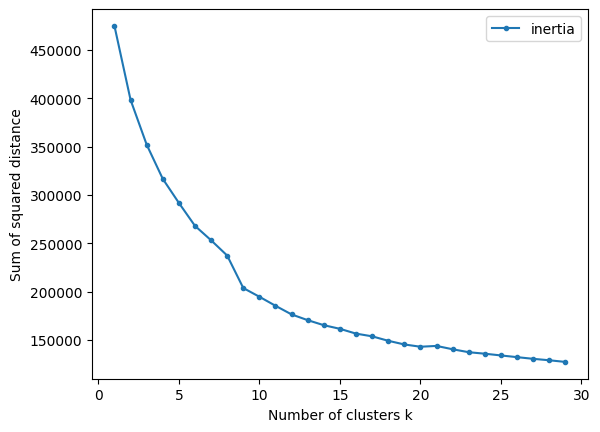

In [12]:
# Find an optimized number of neighors k from a candidate list such as list_k = list(range(1, 30))
distances = []
n_clusters = 30
for k in range(1, n_clusters):
    model = KMeans(n_clusters=k, random_state=rs).fit(features)
    distances.append((k, model.inertia_))

distances_pd = pd.DataFrame(distances)
distances_pd.columns = ['k','inertia']

distances_pd.plot(x='k', y='inertia', marker='.')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distance')
plt.show()

In [13]:
cluster_labels = [None] * len(user_ids)

In [14]:
model = KMeans(n_clusters=10, random_state=rs).fit(features)
cluster_labels = model.labels_

In [15]:
def combine_cluster_labels(user_ids, labels):
    # Convert labels to a DataFrame
    labels_df = pd.DataFrame(labels)    
    # Merge user_ids DataFrame with labels DataFrame based on index
    cluster_df = pd.merge(user_ids, labels_df, left_index=True, right_index=True)
    # Rename columns to 'user' and 'cluster'
    cluster_df.columns = ['user', 'cluster']
    return cluster_df

In [16]:
cluster_df = combine_cluster_labels(user_ids, cluster_labels)

In [17]:
# Extracting features from the user_profile_df DataFrame, excluding the 'user' column
features = user_profile_df.loc[:, user_profile_df.columns != 'user']

# Extracting user IDs from the user_profile_df DataFrame
user_ids = user_profile_df.loc[:, user_profile_df.columns == 'user']

# Creating a list of feature names by excluding the 'user' column name
feature_names = list(user_profile_df.columns[1:])

In [18]:
print(f"There are {len(feature_names)} features for each user profile.")

There are 14 features for each user profile.


In [19]:
# - For a list of candidate `n_components` arguments such as 1 to 14, find out the minimal `n` that can explain accumulated 90% variances of previous data
# - In the fitted PCA() model, you can find explained_variance_ratio_ and use the sum() function to add them to get the accumulated variance ratio
# - Merge the user ids and transformed features into a new dataframe
pca = PCA(n_components=9)
pca.fit_transform(features)
exp_var = pca.explained_variance_ratio_.sum()
components = pd.DataFrame(data=pca.components_)
pca_features = pd.merge(left=user_ids, right=components, left_index=True, right_index=True)

In [20]:
## - Apply KMeans() on the PCA features
## - Obtain the cluster label lists from model.labels_ attribute
## - Assign each user a cluster label by combining user ids and cluster labels
model_pca = KMeans(n_clusters=9, random_state=rs).fit(components)
pca_cluster_labels = model_pca.labels_
pca_cluster_df = combine_cluster_labels(user_ids, pca_cluster_labels)

In [21]:
test_user_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-ML0321EN-Coursera/labs/v2/module_3/ratings.csv"

# Reading the test user data CSV file into a pandas DataFrame
# Selecting only the 'user' and 'item' columns using indexing
test_users_df = pd.read_csv(test_user_url)[['user', 'item']]

# Displaying the first few rows of the DataFrame to inspect its contents
test_users_df.head()

,user,item
0,1889878,CC0101EN
1,1342067,CL0101EN
2,1990814,ML0120ENv3
3,380098,BD0211EN
4,779563,DS0101EN


In [22]:
test_users_labelled = pd.merge(test_users_df, cluster_df, left_on='user', right_on='user')

In [23]:
# Extracting the 'item' and 'cluster' columns from the test_users_labelled DataFrame
courses_cluster = test_users_labelled[['item', 'cluster']]

# Adding a new column 'count' with a value of 1 for each row in the courses_cluster DataFrame
courses_cluster['count'] = [1] * len(courses_cluster)

# Grouping the DataFrame by 'cluster' and 'item', aggregating the 'count' column with the sum function,
# and resetting the index to make the result more readable
courses_cluster_grouped = courses_cluster.groupby(['cluster','item']).agg(enrollments=('count','sum')).reset_index()

In [24]:
recs = []
test_users = test_users_df["user"].unique() 
## - For each user, first finds its cluster label
for test_user in test_users:
    user_subset = test_users_labelled[test_users_labelled.user == test_user]
    user_cluster = user_subset["cluster"].max()
    ## - First get all courses belonging to the same cluster and figure out what are the popular ones (such as course enrollments beyond a threshold like 100)
    cluster_courses = courses_cluster_grouped[courses_cluster_grouped.cluster == user_cluster].sort_values(by='enrollments',ascending=False)
    popular_courses = set(cluster_courses[cluster_courses.enrollments > 300]["item"])
    ## - Get the user's current enrolled courses
    user_courses = set(user_subset.item)
    ## - Check if there are any courses on the popular course list which are new/unseen to the user. 
    diff_set = popular_courses.difference(user_courses)
    if len(diff_set) > 0:    
    ## If yes, make those unseen and popular courses as recommendation results for the user
        recs.append((test_user, list(diff_set)))
        

In [25]:
recs_df = pd.DataFrame(recs)
recs_df.columns = ['user_id','course']
recs_df

,user_id,course
0,1889878,[BD0111EN]
1,1342067,"[DS0105EN, ML0101ENv3, ST0101EN, BD0212EN, BD0..."
2,1990814,"[PA0101EN, BD0123EN, BD0121EN, BD0145EN, RP010..."
3,380098,"[BD0111EN, BD0101EN]"
4,779563,"[DS0105EN, ML0122ENv1, CO0101EN, DS0301EN, RP0..."
...,...,...
33536,1525198,"[DS0105EN, ML0122ENv1, ST0101EN, DS0301EN, DAI..."
33537,1047293,"[DS0105EN, ML0122ENv1, ST0101EN, DS0301EN, DAI..."
33538,1653442,"[DS0105EN, ML0122ENv1, ST0101EN, DS0301EN, DAI..."
33539,946438,"[DS0105EN, ML0122ENv1, ST0101EN, DS0301EN, DAI..."


In [28]:
num_recs = recs_df["course"].apply(lambda x: len(x))

In [29]:
print(f"The average number of recommended courses per user is {num_recs.mean():.0f}.")

The average number of recommended courses per user is 18.


In [30]:
course_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_processed.csv"
course_df = pd.read_csv(course_url)


In [31]:
course_rec_count = []
for course in course_df["COURSE_ID"]:
    rec_cnt = 0
    for recs in recs_df["course"]:
        if course in recs:
            rec_cnt += 1
    # print(f"for course {course}, recommendation count is {rec_cnt}")
    course_rec_count.append((course,rec_cnt))

course_rec = pd.DataFrame(course_rec_count)
course_rec.columns = ['course id','recommendation count']
course_rec = course_rec.sort_values(by='recommendation count',ascending=False)

In [32]:
course_rec.head(10)

,course id,recommendation count
106,ST0101EN,28101
142,ML0115EN,27072
53,WA0101EN,26825
178,DS0301EN,26284
81,BC0101EN,26129
134,DS0105EN,25989
135,DS0103EN,25655
191,DB0101EN,25467
203,RP0101EN,24545
181,BD0111EN,22860
